In [7]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [8]:
from fastai.vision import *
from fastai.metrics import error_rate

## **Data Setup and Preview**

In [9]:
# azure path 
#data_path =  Path.home()/'notebooks/programming/data/watch_bot'
#csv_path = Path.home()/'notebooks/programming/projects/watch_bot/data_prep/file_attribs.csv'

# euler path
data_path =  Path.home()/'programming/data/chrono24'
csv_path = Path.home()/'programming/data/chrono24/file_attribs_inference.csv'

In [10]:
df = pd.read_csv(csv_path)
df = df[['name', 'dial_visibility']]
df = df.astype({'dial_visibility':'int'})
df.head(), df.dtypes

(                                                name  dial_visibility
 0  a._lange_&_soehne_1/a._lange_&_soehne/1815/a._...               -1
 1  a._lange_&_soehne_1/a._lange_&_soehne/1815/a._...               -1
 2  a._lange_&_soehne_1/a._lange_&_soehne/1815/a._...               -1
 3  a._lange_&_soehne_1/a._lange_&_soehne/1815/a._...               -1
 4  a._lange_&_soehne_1/a._lange_&_soehne/1815/a._...               -1,
 name               object
 dial_visibility     int64
 dtype: object)

# **Get Prediction**

## **Single Image**

In [11]:
learn = load_learner(data_path)

tensor([0.9979, 0.0021])
vacheron_constantin_1/vacheron_constantin/_without_model/vacheron_constantin_ultra_plate_yellow_gold-6.jpg


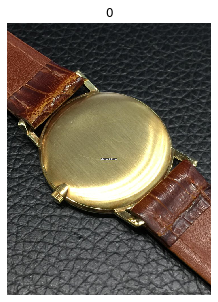

In [29]:
name = df.iloc[999999]['name']
img_path = data_path/name
img = open_image(img_path)
pred_class, pred_idx, outputs = learn.predict(img)
img.show(figsize=(5,5), title=str(pred_class))
print(f'{outputs}\n{name}')

## **Larger Dataset**

In [8]:
learn = load_learner(data_path, test=ImageList.from_df(df, data_path))
preds, y = learn.get_preds(ds_type=DatasetType.Test)
preds[:5]

tensor([[8.2153e-09, 1.0000e+00],
        [4.6110e-09, 1.0000e+00],
        [1.0000e+00, 1.2796e-07],
        [1.0481e-05, 9.9999e-01],
        [5.4813e-07, 1.0000e+00]])